An ensemble method = combining multiple models to get higher accuracy, stability, and better generalization than a single model.

Types of Ensemble Methods

Bagging (Bootstrap Aggregating)

Many models trained in parallel on random subsets.

Example: Random Forest

Boosting

Models trained sequentially, each fixing the previous one’s mistakes.

Examples: AdaBoost, Gradient Boosting, XGBoost

Stacking

Different models (like decision trees, SVM, logistic regression) are combined, and their outputs are fed into a meta-model for final prediction.

A decision stump is just a very simple decision tree with only one split (one level).

AdaBoost

Error Handling: Reweights misclassified samples.
Loss Function: No explicit loss; reduces classification error.
✅ Best for small datasets, interpretability, and imbalanced data.
❌ Sensitive to noise, weaker on complex data.

Gradient Boosting (GBM)

Error Handling: Fits to residuals using gradient descent.
Loss Function: Explicit, differentiable loss functions.
✅ Best for general regression/classification tasks.
❌ Slower training compared to AdaBoost/XGBoost.

XGBoost

Error Handling: Same as GBM but optimized.
Regularization: Built-in (L1, L2) → prevents overfitting.
Optimization: Parallelization + scalability.
✅ Best for large datasets, high performance, competitions.
❌ More complex to tune.

XGBoost achieves its speed and efficiency through a combination of algorithmic and engineering optimizations:
Parallel Processing:
Handling Missing Data:
Tree Pruning (Depth-wise growth with post-pruning):
Column Block (Cache-aware) and Parallel Learning:
Regularization in XGBoost:
Out-of-Core Computing:
(For datasets larger than available memory, XGBoost can use disk-based data structures, enabling it to handle massive datasets efficiently).

Why Cross-Validation is Important in Boosting?

Prevents Overfitting
Helps in Hyperparameter Tuning

Parameters like:
Number of estimators (trees)
Learning rate
Tree depth (in case of stumps, max_depth=1)
Using k-fold CV lets us select the best combination that balances bias vs variance.

Avoids Bias from One Train-Test Split
A single train-test split might give lucky/unlucky results.
CV averages across folds → more reliable performance estimate.
Model Selection

Key Hyperparameters in AdaBoost, Gradient Boosting, XGBoost; Interaction of Learning Rate & Number of Estimators
AdaBoost

n_estimators: number of weak learners.
earning_rate: shrinkage per learner.

Base learner parameters (e.g., tree depth).
Gradient Boosting (GBM)
n_estimators
learning_rate
max_depth
min_samples_split, min_samples_leaf
Subsampling parameters—e.g., row and column sampling.

XGBoost
n_estimators
learning_rate (eta)
max_depth
alpha (L1 regularization), lambda (L2)
min_child_weight, gamma, subsample, colsample_bytree


Over/Underfitting & Curves
Learning/validation curves help visualize model behavior and guide tuning.

1.Task 1 : Diabetes Prediction with XGBoost
Scenario:
 A hospital wants to predict whether a patient has diabetes based on health indicators like glucose levels, BMI, and age.
Dataset:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 
Task:
Train an XGBoost classifier.
Apply 5-fold cross-validation.
Tune hyperparameters like max_depth, learning_rate, n_estimators.
Evaluate using accuracy, precision, recall, F1-score, and ROC-AUC.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:/Users/varsh/Downloads/archive (6)/diabetes.csv")  # Downloaded from Kaggle

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)


param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=xgb, param_grid=param_grid,
                    scoring="accuracy", cv=cv, n_jobs=-1, verbose=1)#This line means:
#👉 "Run grid search on xgb model, try all parameter combinations in param_grid, use accuracy to compare results, apply cross-validation, run on all CPU cores, and print progress while running."

grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)


best_model = grid.best_estimator_


y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154

Accuracy: 0.7467532467532467
Precision: 0.6666666666666666
Recall: 0.5555555555555556
F1-Score: 0.6060606060606061
ROC-AUC: 0.818888888888889


Task 2: Predicting Housing Prices with XGBoost
Scenario:
 A real estate company wants to predict house prices based on various features like location, size, and amenities.
Dataset:
https://www.kaggle.com/datasets/camnugent/california-housing-prices 
Task:
Use XGBoost for regression to predict house prices.


Apply 5-fold cross-validation.
Tune hyperparameters such as learning_rate, n_estimators, and max_depth.
Evaluate using RMSE and R² score.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

data = pd.read_csv("C:/Users/varsh/Downloads/archive (7)/housing.csv"
) 


data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # RMSE
    cv=kfold,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(data.head())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
RMSE: 46410.75185112757
R² Score: 0.8356270505503994
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8

Task 3: Predicting Employee Attrition with XGBoost
Scenario:
 A company wants to predict whether an employee will leave the organization based on their work environment, satisfaction, and salary.
Dataset:
 https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 
Task:
Apply XGBoost to classify employee attrition.
Perform 5-fold cross-validation.
Tune hyperparameters like learning_rate, n_estimators, and max_depth.
Evaluate using accuracy, precision, recall, F1-score, and ROC-AUC.


Dataset Shape: (1470, 35)
Columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98  

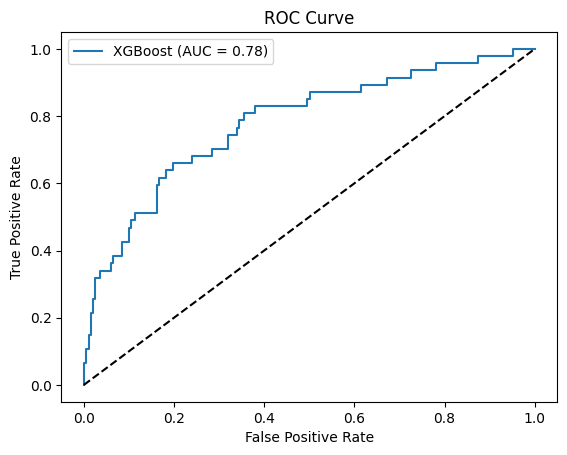

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/varsh/Downloads/archive (8)/WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

X = df.drop("Attrition", axis=1)
y = df["Attrition"].map({"Yes": 1, "No": 0})  



for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="XGBoost (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Task 4: Car Price Prediction with Gradient Boosting
Scenario:
 A car dealership wants to predict the price of a car based on engine, mileage, year, and other features.
Dataset:
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho  
Task:
Implement Gradient Boosting for regression.
Use 5-fold cross-validation.
Tune hyperparameters (learning_rate, n_estimators, max_depth).
Evaluate using RMSE and R² score.


In [21]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:/Users/varsh/Downloads/archive (9)/car data.csv")

print("Dataset Shape:", df.shape)
print(df.head())

le = LabelEncoder()
for col in ['Fuel_Type','Car_Name', 'Seller_Type','Transmission']:
    df[col] = le.fit_transform(df[col])

X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    gbr,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
RMSE: 0.8153
R² Score: 0.9711


Task 5: Credit Card Default Prediction with AdaBoost
Scenario:
 A bank wants to predict whether a customer will default on their credit card payment next month.
Dataset:
 Default of Credit Card Clients Dataset
Task:
Implement AdaBoost with a suitable base estimator.
Use 10-fold cross-validation.
Tune hyperparameters (n_estimators, learning_rate).
Evaluate with accuracy, confusion matrix, and ROC-AUC.



Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
 Best CV Score: 0.8222916666666666

Accuracy: 0.8175

 Confusion Matrix:
 [[4439  234]
 [ 861  466]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000


 ROC-AUC: 0.7528006855589946


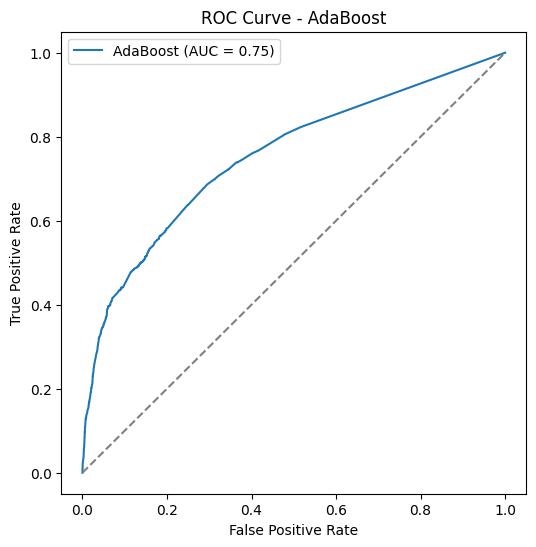

In [25]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/varsh/Downloads/archive (2)/UCI_Credit_Card.csv")

X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0]
}

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)


grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring="accuracy",
    cv=10,   
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(" Best CV Score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="AdaBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.show()
